In [51]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [52]:
base_path = "TESS Toronto emotional speech set data"

paths = []
labels = []
for dirname, _, filenames in os.walk(base_path):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Successfully Loaded!')

Dataset is Successfully Loaded!


In [53]:
paths[:15]

['TESS Toronto emotional speech set data/YAF_disgust/YAF_date_disgust.wav',
 'TESS Toronto emotional speech set data/YAF_disgust/YAF_rag_disgust.wav',
 'TESS Toronto emotional speech set data/YAF_disgust/YAF_raise_disgust.wav',
 'TESS Toronto emotional speech set data/YAF_disgust/YAF_ditch_disgust.wav',
 'TESS Toronto emotional speech set data/YAF_disgust/YAF_door_disgust.wav',
 'TESS Toronto emotional speech set data/YAF_disgust/YAF_note_disgust.wav',
 'TESS Toronto emotional speech set data/YAF_disgust/YAF_pearl_disgust.wav',
 'TESS Toronto emotional speech set data/YAF_disgust/YAF_search_disgust.wav',
 'TESS Toronto emotional speech set data/YAF_disgust/YAF_late_disgust.wav',
 'TESS Toronto emotional speech set data/YAF_disgust/YAF_peg_disgust.wav',
 'TESS Toronto emotional speech set data/YAF_disgust/YAF_ring_disgust.wav',
 'TESS Toronto emotional speech set data/YAF_disgust/YAF_tool_disgust.wav',
 'TESS Toronto emotional speech set data/YAF_disgust/YAF_puff_disgust.wav',
 'TESS To

In [56]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,TESS Toronto emotional speech set data/YAF_dis...,disgust
1,TESS Toronto emotional speech set data/YAF_dis...,disgust
2,TESS Toronto emotional speech set data/YAF_dis...,disgust
3,TESS Toronto emotional speech set data/YAF_dis...,disgust
4,TESS Toronto emotional speech set data/YAF_dis...,disgust


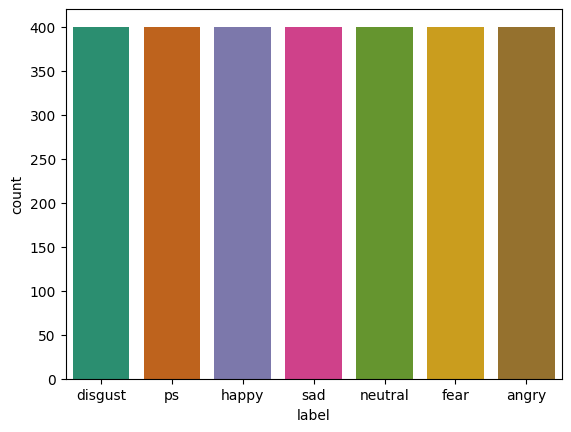

In [57]:
sns.countplot(data = df, x = 'label',palette = 'Dark2');

In [58]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (10,4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (11,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz' )
    plt.colorbar()


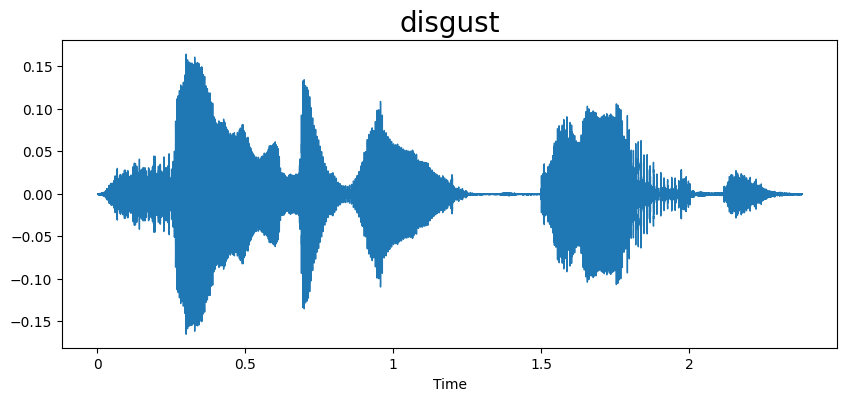

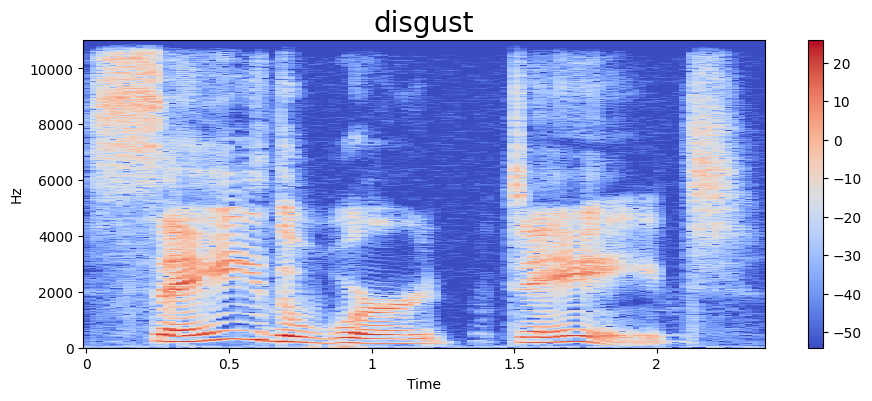

In [59]:
emotion ='disgust'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

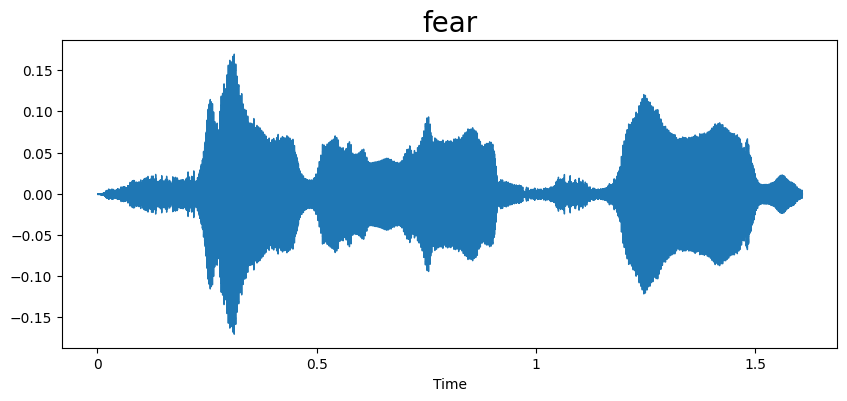

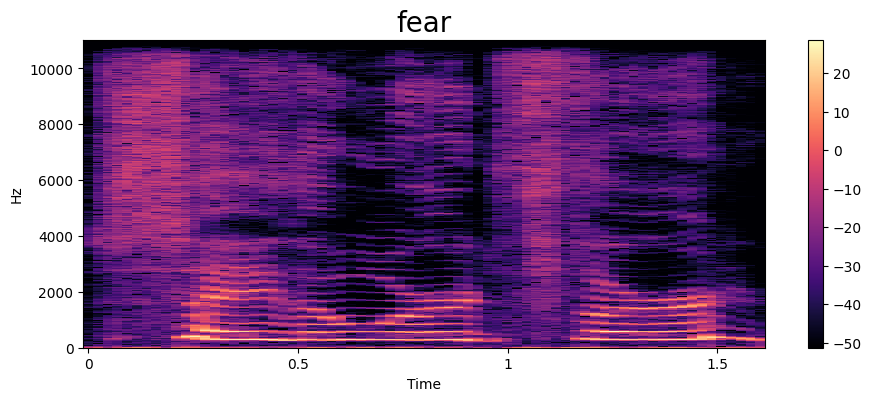

In [60]:
emotion ='fear'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

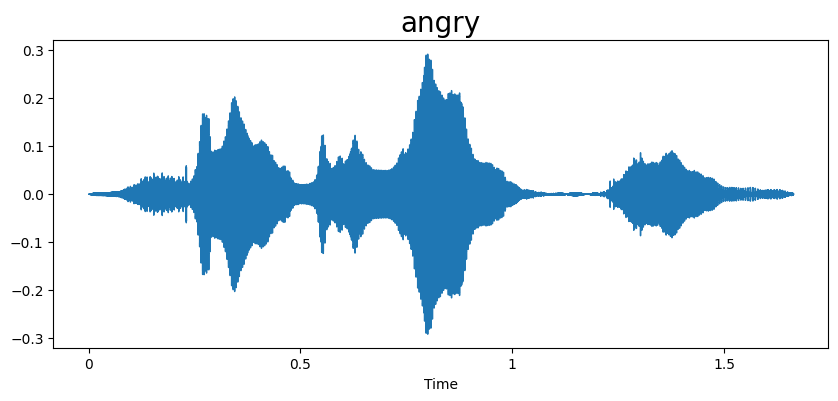

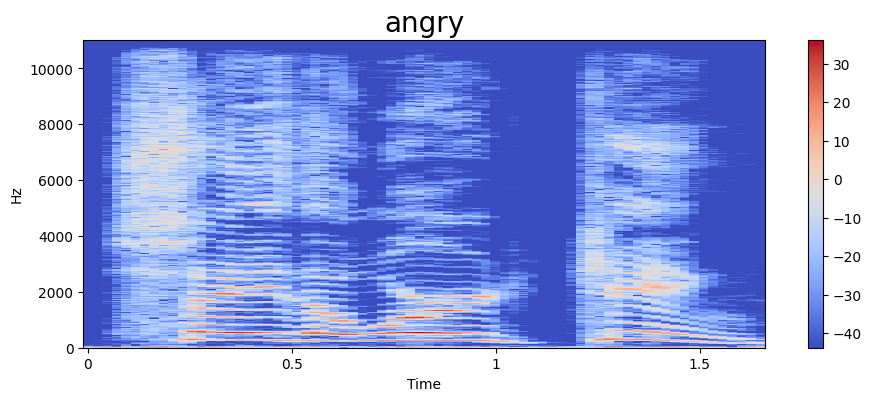

In [61]:
emotion ='angry'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

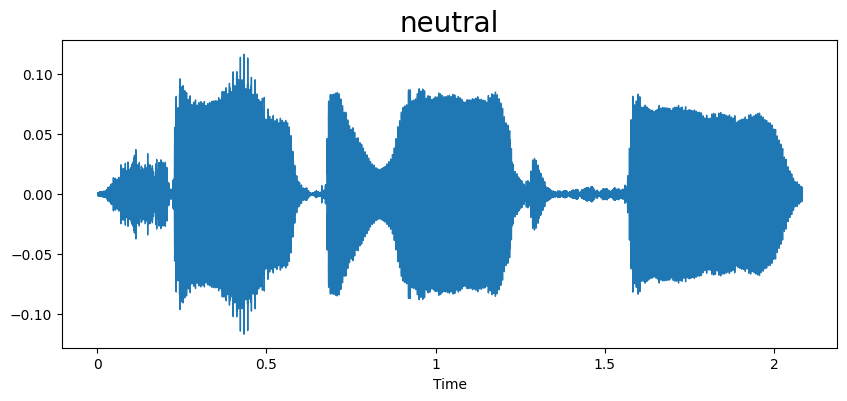

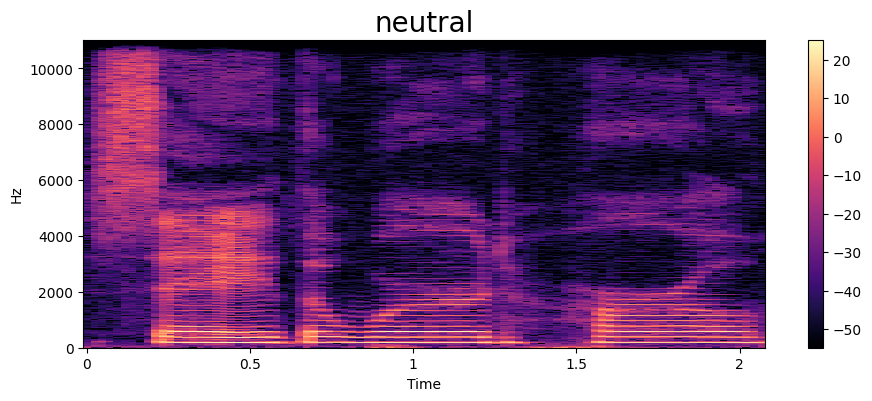

In [62]:
emotion ='neutral'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

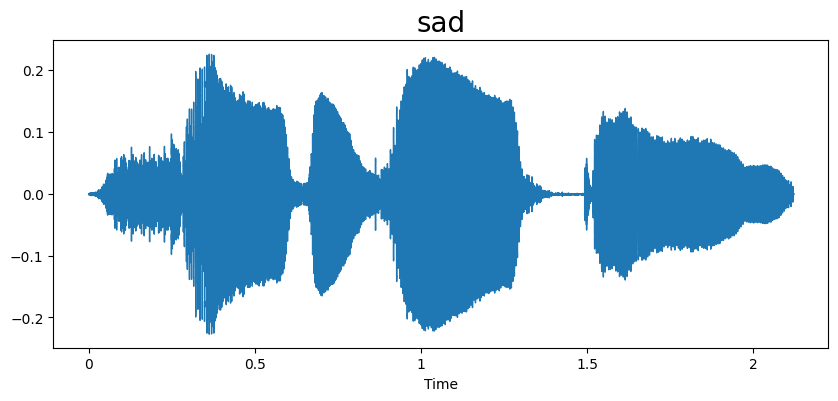

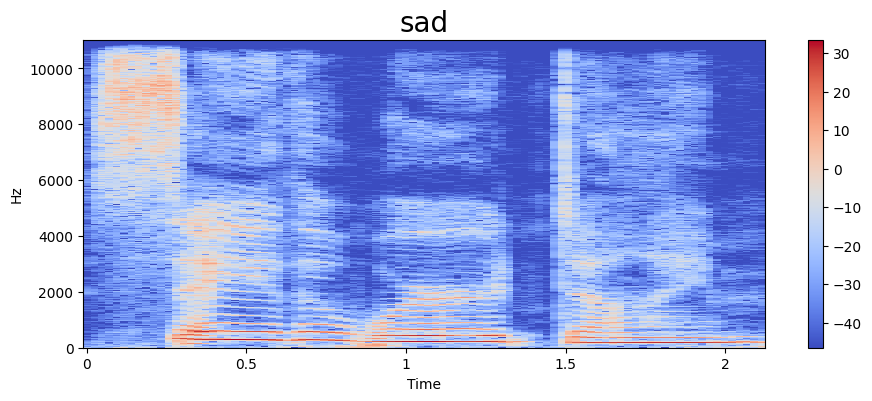

In [63]:
emotion ='sad'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)
     

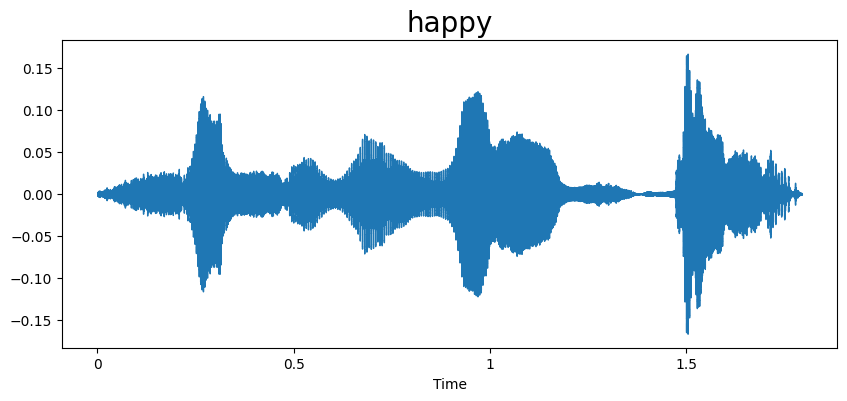

NameError: name 'spectogram' is not defined

In [64]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

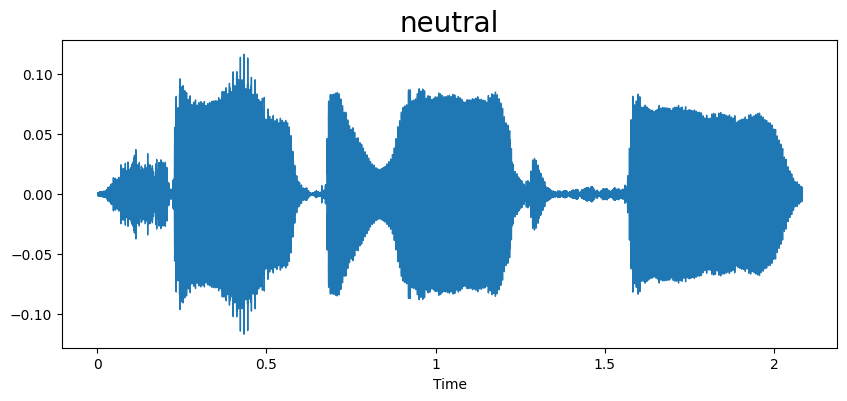

NameError: name 'spectogram' is not defined

In [65]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

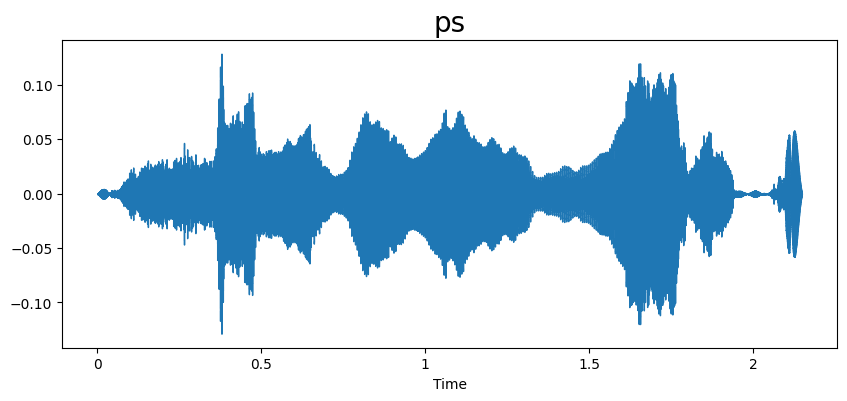

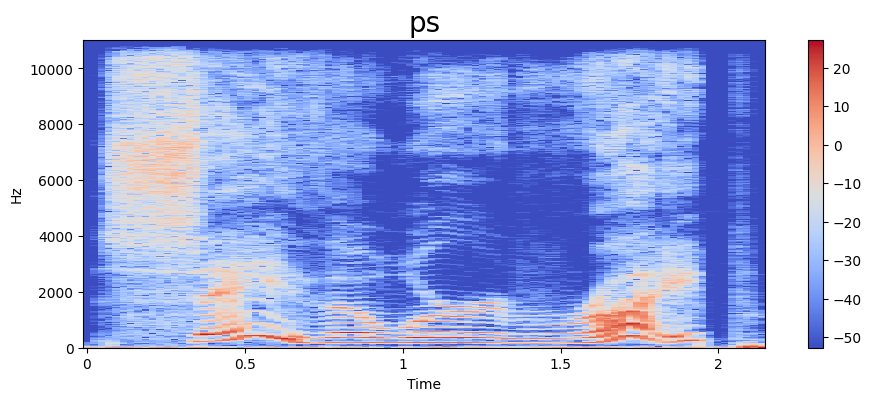

In [66]:
emotion ='ps'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

In [67]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [68]:
extract_mfcc(df['speech'][0])
     

array([-4.4636795e+02,  7.3789307e+01,  1.5521718e+00,  4.0626896e+01,
       -8.4494524e+00, -2.9341390e+00, -6.6822028e+00, -1.7199314e+01,
       -5.6114125e+00, -1.3409514e+01, -7.3893199e+00,  6.8370881e+00,
       -1.0458900e+01,  3.2033243e+00, -1.0037700e+00, -5.6148534e+00,
        4.2504106e+00, -1.1169558e+00, -9.1154451e+00,  2.1831045e+00,
       -7.7419267e+00,  6.4607900e-01, -3.6939952e+00,  3.7297583e-01,
       -2.0016887e+00, -1.8217638e+00, -2.7837276e+00,  2.8430927e+00,
       -3.0322781e+00,  4.5028725e+00, -8.8743967e-01,  4.2168193e+00,
        1.7408412e+00,  3.8251686e+00,  4.3130198e+00,  3.1095667e+00,
        3.5192683e+00,  4.1317463e+00,  2.2578504e+00,  2.3055401e+00],
      dtype=float32)

In [70]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
     

In [71]:
x_mfcc

0       [-446.36795, 73.78931, 1.5521718, 40.626896, -...
1       [-383.37564, 108.15568, -17.578175, 15.888096,...
2       [-404.0382, 87.21107, 0.48702008, 22.224413, -...
3       [-444.80597, 67.52622, -3.808903, 31.318571, -...
4       [-430.42755, 118.75985, 6.9652796, 5.20493, -8...
                              ...                        
2795    [-574.7826, 95.66922, 34.85124, 16.82163, 17.9...
2796    [-557.9271, 89.87658, 33.661488, 15.33976, 22....
2797    [-527.0877, 115.282486, 26.17239, 7.6268435, 1...
2798    [-560.78094, 121.283714, 40.302486, -1.9568784...
2799    [-552.6838, 106.72334, 35.172695, 8.060721, 22...
Name: speech, Length: 2800, dtype: object

In [72]:
x = [x for x in x_mfcc]
x = np.array(x)
x.shape

(2800, 40)

In [73]:
x = np.expand_dims(x, -1)
x.shape
     

(2800, 40, 1)

In [74]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
     

y = y.toarray()
     

y.shape

(2800, 7)

In [75]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape=(40,1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.summary()
     

2023-09-30 18:17:18.958056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-30 18:17:39.787036: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [76]:
history = model.fit(x,y, validation_split= 0.2, epochs = 50, batch_size =512, shuffle = True)

Epoch 1/50
5/5 [==============================] - 3s 298ms/step - loss: 1.8890 - accuracy: 0.1906 - val_loss: 2.0313 - val_accuracy: 0.1304
Epoch 2/50
5/5 [==============================] - 1s 158ms/step - loss: 1.7462 - accuracy: 0.3362 - val_loss: 1.9644 - val_accuracy: 0.2375
Epoch 3/50
5/5 [==============================] - 1s 162ms/step - loss: 1.6201 - accuracy: 0.4259 - val_loss: 1.9318 - val_accuracy: 0.0964
Epoch 4/50
5/5 [==============================] - 1s 162ms/step - loss: 1.4711 - accuracy: 0.4879 - val_loss: 1.9132 - val_accuracy: 0.0143
Epoch 5/50
5/5 [==============================] - 1s 159ms/step - loss: 1.2686 - accuracy: 0.5665 - val_loss: 1.7675 - val_accuracy: 0.1071
Epoch 6/50
5/5 [==============================] - 1s 158ms/step - loss: 1.0033 - accuracy: 0.6638 - val_loss: 1.7199 - val_accuracy: 0.1732
Epoch 7/50
5/5 [==============================] - 1s 157ms/step - loss: 0.7922 - accuracy: 0.7250 - val_loss: 1.7305 - val_accuracy: 0.1911
Epoch 8/50
5/5 [====

In [77]:
acc = history.history['accuracy']
mean_accuracy = sum(acc)/len(acc)
mean_accuracy*100

90.29285714030266